# Learning tensors for General Relativity

In [1]:

from sympy import *
from sympy.tensor.tensor import TensorIndexType, TensorIndex, TensorHead, tensor_indices, tensor_heads
from sympy.tensor.toperators import PartialDerivative
init_printing()
import sys
print(sys.version)

Loading modified arrayop.py
3.9.19 (main, May  6 2024, 19:43:03) 
[GCC 11.2.0]


## Christoffel symbols for 2D sphere

In [2]:
theta, phi = symbols('theta phi')

### Define the metric

In [3]:
L = TensorIndexType('L', dummy_name='L', dim=2)
g = tensor_heads('g', [L, L])
m, n, t  = tensor_indices('m n t', L)
metric_array = [[1,0],[0,sin(theta)**2]]
metric_repl = {L: metric_array, g(-m,-n):metric_array}
metric = g(-m,-n).replace_with_arrays(metric_repl)
g(-m,-n), metric

⎛     ⎡1     0   ⎤⎞
⎜     ⎢          ⎥⎟
⎜g  , ⎢      2   ⎥⎟
⎝ mn  ⎣0  sin (θ)⎦⎠

### Define a tensor (not a true tensor) for the Christoffel symbols

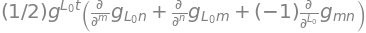

⎡                     ⎡        cos(θ)⎤⎤
⎢                     ⎢  0     ──────⎥⎥
⎢⎡0        0       ⎤  ⎢        sin(θ)⎥⎥
⎢⎢                 ⎥  ⎢              ⎥⎥
⎢⎣0  -sin(θ)⋅cos(θ)⎦  ⎢cos(θ)        ⎥⎥
⎢                     ⎢──────    0   ⎥⎥
⎣                     ⎣sin(θ)        ⎦⎦

In [4]:
def christoffel2(metric):
    x = tensor_heads('_', [L])
    m, n, r, t, q  = tensor_indices('m n r t q', L)
    x_repl = {x(q): [theta, phi]}

    christoffel_exp = g(r,t) / 2 * (PartialDerivative(g(-r, -m), x(n)) + PartialDerivative(g(-r, -n), x(m)) - PartialDerivative(g(-m, -n), x(r)))
    gamma = tensor_heads('Gamma', [L, L, L])
    gamma_repl = {gamma(-m, -n, t):christoffel_exp.replace_with_arrays(x_repl | metric_repl)}
    gamma_result = gamma(-m, -n, t).replace_with_arrays(gamma_repl)
    return christoffel_exp, gamma, gamma_result

def test_christoffel2():
    expression, gamma, result = christoffel2(metric)
    display(expression)
    display(gamma(-m, -n, t))
    display(result)
test_christoffel2()
    

## Riemann Curvature Tensor $R$

In [5]:
_, gamma, gamma_result = christoffel2(metric)

display(gamma_result)

i, j, k, m, q, r  = tensor_indices('i j k m q, r', L)
x = tensor_heads('x', [L])
x_repl = {x(q): [theta, phi]}
R_exp = (
    PartialDerivative(gamma(i, -j, -m), x(k)) - 
    PartialDerivative(gamma(i, -j, -k), x(m)) + 
    gamma(i, -r, -k) * gamma(r, -j, -m) - 
    gamma(i, -r, -m) * gamma(r, -j, -k))
display(R_exp)

R = tensor_heads('R', [L, L, L, L])
gamma_repl = {gamma(i, -j, -m) : gamma_result}
R_repl = {R(-j, -k, -m, i): R_exp.replace_with_arrays(x_repl | gamma_repl)}
result = R(-j, -k, -m, i).replace_with_arrays(R_repl)
display(result)
display(result[0,1,0,1])
display(result[0,1,1,0])
display(result[1,0,1,0])
display(result[1,0,0,1])


⎡                     ⎡        cos(θ)⎤⎤
⎢                     ⎢  0     ──────⎥⎥
⎢⎡0        0       ⎤  ⎢        sin(θ)⎥⎥
⎢⎢                 ⎥  ⎢              ⎥⎥
⎢⎣0  -sin(θ)⋅cos(θ)⎦  ⎢cos(θ)        ⎥⎥
⎢                     ⎢──────    0   ⎥⎥
⎣                     ⎣sin(θ)        ⎦⎦

⎡         ⎡             2   ⎤⎤
⎢⎡0  0⎤   ⎢   0     -sin (θ)⎥⎥
⎢⎢    ⎥   ⎢                 ⎥⎥
⎢⎣0  0⎦   ⎢   2             ⎥⎥
⎢         ⎣sin (θ)     0    ⎦⎥
⎢                            ⎥
⎢⎡0   1⎤        ⎡0  0⎤       ⎥
⎢⎢     ⎥        ⎢    ⎥       ⎥
⎣⎣-1  0⎦        ⎣0  0⎦       ⎦